<h2 style="color: #fff;">
    Clusterizaço de Dados
</h2>

<p style="color: #b4b4bb;">
    Algoritimo de clusterização (agrupamento) de dados.
</p>

In [21]:
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv'
dataframe = pd.read_csv(url)

dataframe.drop(columns=['CUST_ID', 'TENURE'], inplace=True) # Fazendo o pré-processamento dos dados.
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [22]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [23]:
dataframe.fillna(dataframe.median(), inplace=True) # Preenche os dados NaN com a mediana das colunas
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


<p style="color: #b4b4bb;">
    Normalizando os dados do dataframe para todos ficarem no mesmo padrão.
</p>

In [24]:
from sklearn.preprocessing import Normalizer
normalized_values = Normalizer().fit_transform(dataframe.values)

<p style="color: #b4b4bb;">
    Clusterizando os dados com o KMeans
</p>

In [25]:
from sklearn.cluster import KMeans

# n_clusters = Número de clusters a serem gerados
# n_init = Retorna o número de vezes seguidas o mesmo valor (parecido com a SEED do random_state)
# max_iter = Número de itarações que o cluster vai fazer

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_predicted = kmeans.fit_predict(normalized_values) # Valores preditos (resultados) da clusterização

<h4 style="color: #fff;">
    Validando o cluster
</h4>

<p style="color: #b4b4bb;">
    Calculando o coeficiente de Silhouette.
</p>

In [26]:
from sklearn.metrics import silhouette_score

labels = kmeans.labels_
dataframe['cluster'] = labels

# metric = Métrica para calcular o coeficiente (geralmente é utilizada a métrica Euclidiana)
silhouette = silhouette_score(normalized_values, labels, metric='euclidean')
silhouette

# Maior que zero é considerado um valor bom

0.36457606314711744

<p style="color: #b4b4bb;">
    Calculando o Davies-Bouldin.
</p>

In [27]:
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(normalized_values, labels)
dbs

# Quanto mais próximo de zero melhor

1.0749530537541765

<p style="color: #b4b4bb;">
    Calculando o Calinski.
</p>

In [28]:
from sklearn.metrics import calinski_harabasz_score

calinski = calinski_harabasz_score(normalized_values, labels)
calinski

3431.5800207486104

<p style="color: #b4b4bb;">
    Adicionando função para clusterizar os dados.
</p>

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)

    silhouette = silhouette_score(dataset, labels, metric='euclidean')
    dbs = davies_bouldin_score(dataset, labels)
    calinski = calinski_harabasz_score(dataset, labels)

    return silhouette, dbs, calinski

In [30]:
clustered_data = clustering_algorithm(5, normalized_values)
clustered_data

(0.36457606314711744, 1.0749530537541765, 3431.5800207486104)

<p style="color: #b4b4bb;">
    Gerando conjunto de dados aleatórios com base no dataframe para conparar a clusterização principal.
</p>

In [31]:
import numpy as np

random_data_rows_number = dataframe.count().max()
random_data_columns_number = dataframe.count(axis=1).max()

random_data = np.random.rand(random_data_rows_number, random_data_columns_number)
random_cluster = clustering_algorithm(5, random_data)

print(f'Dados randomicos: ', random_cluster)
print(f'Dados normais: ', clustered_data)

Dados randomicos:  (0.037061724700488366, 3.6455540678078457, 283.98159971893574)
Dados normais:  (0.36457606314711744, 1.0749530537541765, 3431.5800207486104)


<p style="color: #b4b4bb;">
    Validando a estabilidade do cluster.
</p>

In [32]:
dataset1, dataset2, dataset3 = np.array_split(normalized_values, 3)

dataset1_cluster = clustering_algorithm(5, dataset1)
dataset2_cluster = clustering_algorithm(5, dataset2)
dataset3_cluster = clustering_algorithm(5, dataset3)

print(f'Dataset 1: ', dataset1_cluster)
print(f'Dataset 2: ', dataset2_cluster)
print(f'Dataset 3: ', dataset3_cluster)

Dataset 1:  (0.3692455604046628, 1.0550439720459241, 1203.9722444846889)
Dataset 2:  (0.35406999696241026, 1.138955453029994, 1194.945411949724)
Dataset 3:  (0.36704188760608253, 1.0984932613776761, 1167.5309516803998)


<h4 style="color: #fff;">
    Interpretando os clusters
</h4>

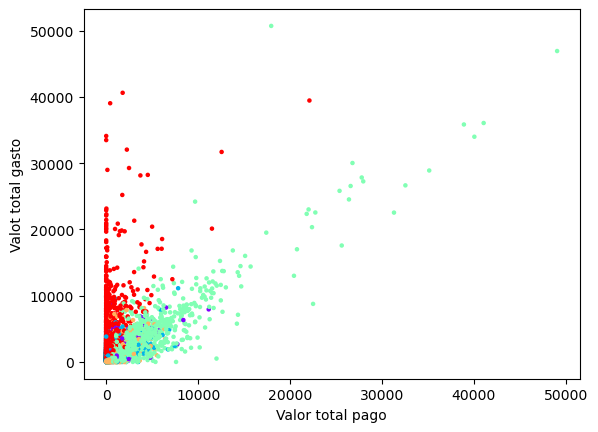

In [33]:
import matplotlib.pyplot as plt

plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Valor total pago')
plt.ylabel('Valot total gasto')

plt.show()

<p style="color: #b4b4bb;">
    Analisando os valores
</p>

In [34]:
centroids = kmeans.cluster_centers_
centroids

array([[3.25353404e-01, 2.65107134e-04, 1.56328874e-01, 3.19956843e-02,
        1.24729430e-01, 5.85055530e-02, 1.64871703e-04, 2.32153428e-05,
        1.48371109e-04, 1.94946303e-05, 4.27312575e-04, 3.84405841e-03,
        3.70133058e-01, 2.52368047e-01, 6.87847998e-01, 4.41810140e-06],
       [5.05989164e-01, 2.73074755e-04, 6.25843508e-02, 3.68439095e-02,
        2.57622119e-02, 2.50057502e-01, 6.83158347e-05, 2.62481331e-05,
        4.55565431e-05, 5.70480115e-05, 1.14571531e-03, 1.34994337e-03,
        7.18745256e-01, 1.66305540e-01, 1.80598456e-01, 5.33805925e-07],
       [1.60110416e-01, 2.45280705e-04, 4.37732651e-01, 2.56517188e-01,
        1.81386198e-01, 2.59067324e-02, 2.04540918e-04, 8.88590206e-05,
        1.50834052e-04, 9.42624608e-06, 1.73138127e-04, 6.16861108e-03,
        6.03132261e-01, 4.03855410e-01, 8.58012060e-02, 7.22720247e-05],
       [6.92851115e-02, 2.30533975e-04, 1.21270195e-01, 4.79607490e-02,
        7.34096142e-02, 2.47304078e-02, 1.72496260e-04, 3.365

In [35]:
description = dataframe.groupby('cluster')['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
n_clients = description.size()

description = description.mean()
description['n_clients'] = n_clients

description

C:\Users\Nevio Costa Magagnin\AppData\Local\Temp\ipykernel_10188\1656059463.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby('cluster')['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,1963.743393,850.298471,417.369198,2210.275689,1339.214906,399
1,3044.938037,389.000167,1621.851847,4489.610144,968.134662,2642
2,1143.323704,3266.487766,183.835583,4092.072637,3044.597207,1544
3,445.102105,628.639333,143.824757,5131.606811,813.968250,3284
4,1800.909055,466.019473,3287.022132,3987.068651,4667.483007,1081
